In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

from letterbox import letterbox

In [2]:
model_path = "models/nano/best_saved_model/"

model = tf.saved_model.load(model_path)

In [3]:
real_img = cv2.imread('images/test.jpg')
image, ratio, dwdh = letterbox(real_img, auto=False)
image = np.expand_dims(image, 0) / 255.

image = image.astype(np.float32)
output_data = model(image).numpy()[0]
print(output_data.shape)

(5, 8400)


In [4]:
output_data = output_data[:,output_data[4]>0.1].T
output_data = output_data[output_data[:, 1].argsort()]
output_data = output_data[output_data[:, 0].argsort()]
print(output_data.shape)

(50, 5)


[117, 66, 162, 125] 0.77
[267, 50, 313, 112] 0.8
[494, 89, 544, 146] 0.8
[700, 60, 748, 123] 0.79
[862, 108, 906, 164] 0.76


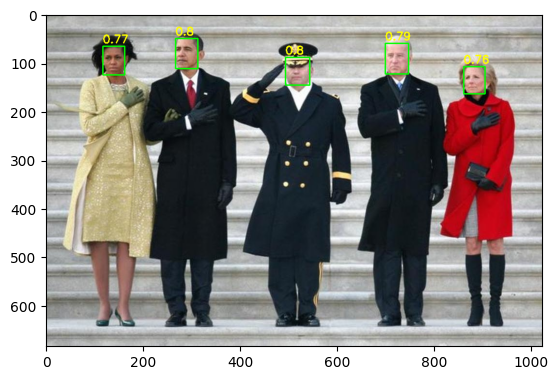

In [5]:
thresh = 0.5

for (x0, y0, x1, y1, scores) in output_data[output_data.shape[0]%10::10]:
    if scores > thresh-1:
        x0 -= dwdh[0]
        y0 -= dwdh[1]
        box = np.array([x0-x1/2, y0-y1/2, x0+x1/2, y0+y1/2])
        box /= ratio
        box = np.round(box).astype(np.int32).tolist()

        score = round(float(scores), 2)
        print(box, score)

        cv2.rectangle(real_img, box[:2], box[2:], (0,255,0), 2)
        cv2.putText(real_img, str(score), (box[0], box[1] - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.75, [0, 255, 255], thickness=2)
            
plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
cap = cv2.VideoCapture("images/test.mp4")

if (cap.isOpened()== False):
    print("Error opening video file")

thresh = 0.3
    
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        image, ratio, dwdh = letterbox(frame, auto=False)
        image = np.expand_dims(image, 0) / 255.

        image = image.astype(np.float32)
        output_data = model(image).numpy()[0]
        output_data = output_data[:,output_data[4]>0.1].T
        output_data = output_data[output_data[:, 1].argsort()]
        output_data = output_data[output_data[:, 0].argsort()]

        for (x0, y0, x1, y1, scores) in output_data[output_data.shape[0]%10::10]:
            if scores > thresh:
                x0 -= dwdh[0]
                y0 -= dwdh[1]
                box = np.array([x0-x1/2, y0-y1/2, x0+x1/2, y0+y1/2])
                box /= ratio
                box = np.round(box).astype(np.int32).tolist()

                score = round(float(scores), 2)

                cv2.rectangle(frame, box[:2], box[2:], (0,255,0), 2)
                cv2.putText(frame, str(score), (box[0], box[1] - 7), cv2.FONT_HERSHEY_SIMPLEX, 0.75, [0, 255, 255], thickness=2)
        
        cv2.imshow('Frame', frame)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()